<a href="https://colab.research.google.com/github/brittanyasare04/pca_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [2]:
! git clone https://github.com/ds3001f25/pca_assignment.git

Cloning into 'pca_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 1.54 MiB | 4.82 MiB/s, done.


In [3]:
import pickle
with open('/content/pca_assignment/data/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

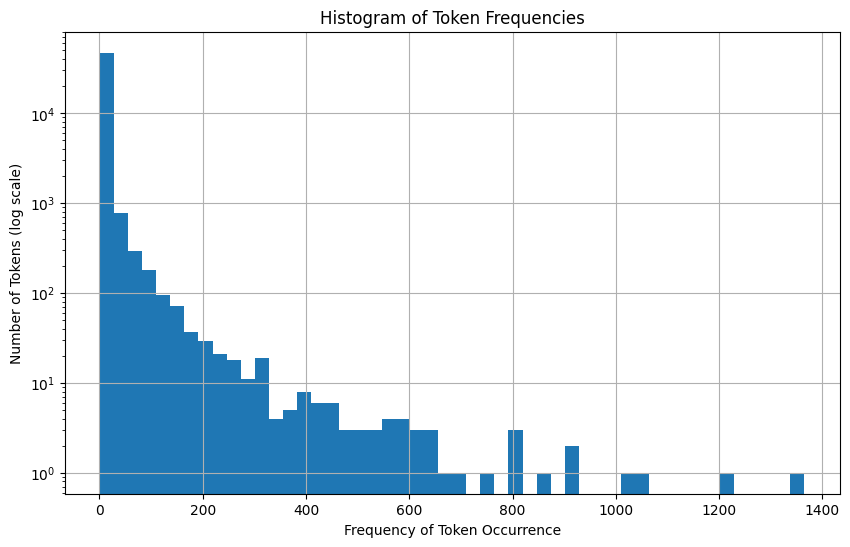

In [6]:
# Creating a histogram
import matplotlib.pyplot as plt
import numpy as np

# Extract frequencies from token_freq
frequencies = [freq for token, freq in token_freq]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=50, log=True) # Use log scale for the y-axis to better visualize the distribution
plt.xlabel("Frequency of Token Occurrence")
plt.ylabel("Number of Tokens (log scale)")
plt.title("Histogram of Token Frequencies")
plt.grid(True)
plt.show()

What I noticed about histogram is that the graph is highly skewed in its distribution.The token frequency is that as the frequency of token occurence increases, the number of tokens decreases logrithmically.

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [4]:
# Loading in Phishing_clean.parquet
import pandas as pd
df = pd.read_parquet('/content/pca_assignment/data/Phishing_clean.parquet')

In [6]:
# Perform an 80/20 train-test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Email Type'])
y = df['Email Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14907, 2711)
Shape of X_test: (3727, 2711)
Shape of y_train: (14907,)
Shape of y_test: (3727,)


In [7]:
# Run a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared on the training set: {r2_train:.4f}")
print(f"R-squared on the test set: {r2_test:.4f}")

R-squared on the training set: 0.7670
R-squared on the test set: 0.6659


The R^2 on the training set is 0.7670 and the R^2 on the test set is 0.6659

In [8]:
# Get the coefficients and feature names
coefficients = model.coef_
feature_names = X_train.columns

# Create a pandas Series for easier handling
coef_series = pd.Series(coefficients, index=feature_names)

# Sort coefficients by absolute value and get the top N
top_n = 20 # You can change this number to display more or fewer words
top_influential_words = coef_series.abs().sort_values(ascending=False).head(top_n)

# Display the top influential words and their coefficients
print("Top influential words and their coefficients (by absolute value):")
print(coef_series[top_influential_words.index])

Top influential words and their coefficients (by absolute value):
intervention        -1.259257
localized            0.824350
thermal              0.747006
crawler              0.696167
background-image:   -0.622909
helvetica,           0.598560
aging                0.594956
form.                0.576886
gray;               -0.574480
a:active             0.574480
retrieving          -0.573761
zdnet               -0.560954
{text-decoration:    0.497075
xanaax               0.491981
transcript           0.488978
shopper             -0.486678
april's             -0.486483
arial,              -0.482141
laser                0.473607
issue:              -0.465547
dtype: float64


Some words that have the strongest coeffcient are localized, xanaax, laser, thermal, crawler, helvetica, aging, form, active, and decoration.

### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

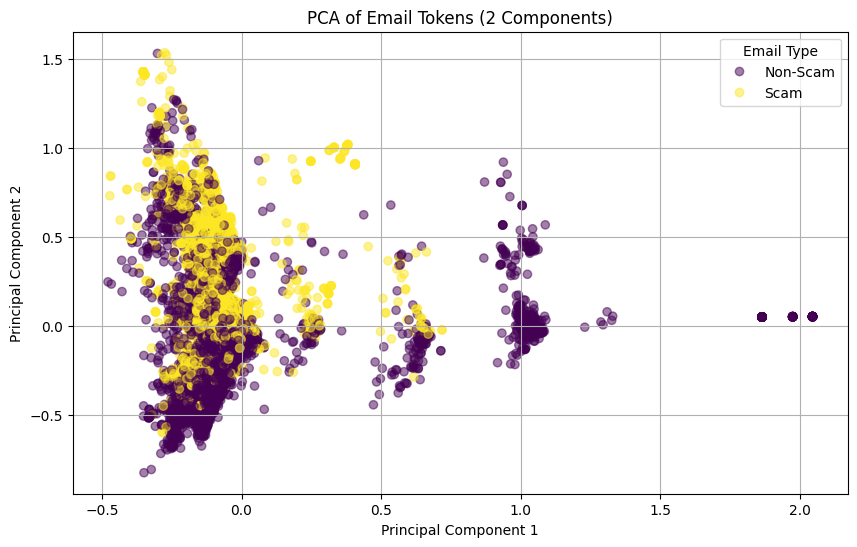

In [9]:
# Perform PCA with two components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Email Tokens (2 Components)")

# Add a color bar to indicate email type (0 for non-scam, 1 for scam)
legend_labels = ['Non-Scam', 'Scam']
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Email Type")


plt.grid(True)
plt.show()

The pattern that I see are that the two colors are heavily mixed, meaning that the first two components alone are not sufficent enough to distinguish between the two classes. This also indicates that it does not do a good job in distinguishing between scam and non-scam emails.

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [10]:
# Perform PCA with 2610 components
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pca_2610 = PCA(n_components=2610)
X_pca_2610 = pca_2610.fit_transform(X)

# Split the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2610, y, test_size=0.2, random_state=42)

# Run a linear regression on the principal components
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict and calculate R-squared
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

r2_train_pca = r2_score(y_train, y_train_pred_pca)
r2_test_pca = r2_score(y_test, y_test_pred_pca)

print(f"R-squared on the training set (PCA): {r2_train_pca:.4f}")
print(f"R-squared on the test set (PCA): {r2_test_pca:.4f}")

R-squared on the training set (PCA): 0.7662
R-squared on the test set (PCA): 0.6684


In comparison to the linear regression that was run, it performs relatively similar. The R^2 on the test set is slightly higher for the model trained on the PCA. This would mean the it might lead to a slightly better generalization in performance.

### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

The advantage in using principal componenets to run this high-dimensional regression rather than the original data would be that it helps handle the higher complexities of the high-dimensional data by creating a new set of uncorrelated features that would capture the most important data patters. This can lead to potentially better performing regression model than the using the originial data.